In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append("../")

from cube3_game import Cube3Game

In [3]:
df = pd.read_pickle("../assets/reports/cpp_reports.pkl")

In [5]:
df[(df['visit_nodes'] > 100_000) & (df['visit_nodes'] < 200_000)]

,i,state,target_distance,solution,h_values,visit_nodes,duration_sec
562,562,"[38, 10, 33, 37, 22, 28, 17, 34, 15, 24, 52, 4...",16,"[-1, 6, 12, 0, 7, 12, 9, 9, 14, 1, 11, 12, 0, ...","[23.539, 20.859, 20.076, 19.202, 18.101, 17.70...",134259,40.357
622,622,"[29, 39, 9, 14, 40, 52, 18, 12, 26, 11, 41, 53...",18,"[-1, 13, 5, 5, 3, 17, 6, 16, 5, 6, 6, 13, 0, 1...","[25.546, 23.99, 22.692, 21.714, 20.566, 19.52,...",116418,36.810
628,628,"[18, 43, 9, 32, 49, 46, 24, 21, 53, 47, 14, 33...",18,"[-1, 10, 13, 5, 11, 13, 7, 3, 13, 1, 10, 4, 10...","[19.947, 18.812, 19.864, 19.61, 17.653, 16.799...",148775,47.931
634,634,"[0, 5, 26, 37, 40, 28, 20, 39, 8, 2, 32, 11, 1...",18,"[-1, 10, 3, 14, 7, 17, 15, 0, 5, 9, 2, 10, 16,...","[18.367, 16.359, 14.535, 15.011, 14.666, 11.93...",108567,33.792
635,635,"[51, 41, 36, 43, 22, 39, 33, 28, 6, 53, 1, 38,...",18,"[-1, 9, 14, 5, 0, 16, 5, 9, 15, 11, 17, 5, 13,...","[21.408, 21.034, 19.493, 17.506, 15.763, 14.21...",166579,54.117
644,644,"[2, 19, 51, 28, 31, 50, 53, 16, 44, 26, 46, 45...",19,"[-1, 4, 8, 13, 4, 7, 14, 1, 12, 10, 15, 8, 12,...","[25.074, 22.02, 20.295, 20.529, 19.466, 16.643...",174910,56.219
667,667,"[18, 43, 29, 23, 22, 25, 51, 7, 20, 35, 10, 27...",20,"[-1, 7, 12, 17, 1, 15, 17, 2, 1, 17, 0, 7, 11,...","[21.945, 20.998, 18.751, 19.628, 18.327, 17.88...",141638,42.291
674,674,"[29, 28, 6, 14, 49, 12, 45, 48, 51, 44, 43, 42...",20,"[-1, 11, 17, 6, 12, 4, 6, 13, 1, 10, 3, 6, 10,...","[16.591, 18.662, 18.674, 18.018, 16.007, 15.54...",103370,31.058
680,680,"[36, 7, 51, 41, 49, 23, 15, 43, 27, 45, 48, 2,...",20,"[-1, 12, 11, 16, 4, 3, 10, 12, 2, 11, 2, 11, 1...","[22.836, 20.78, 17.508, 16.802, 17.381, 17.936...",173645,52.321
683,683,"[42, 19, 24, 28, 4, 12, 29, 30, 53, 0, 23, 33,...",20,"[-1, 0, 9, 17, 4, 13, 4, 13, 9, 5, 14, 10, 2, ...","[26.485, 23.215, 22.129, 20.771, 20.63, 19.31,...",100823,29.125


: 

In [3]:
len(df[df['target_distance'] == 29])

45

: 

In [27]:
distance_df = pd.read_pickle("/Users/euclid/Projects/DeepDeepCube/assets/tests/test_distance.pickle")

In [35]:
len(distance_df[distance_df == 29])

45

In [36]:
import numpy as np

In [39]:
num_random_disatnces = np.random.choice(
        a=np.arange(0, 30),
        size=1000
)
num_random_disatnces

array([18, 26, 20,  3, 10, 13,  6, 25, 19,  1, 11, 13,  6,  4,  9,  8,  6,
        1, 23,  2,  7, 21, 16, 16, 19, 24, 27, 17, 16, 27,  2, 10, 26, 19,
        1, 29, 28, 29,  8, 11, 20,  1,  5,  1,  9, 10, 28, 15, 23, 13, 18,
        3, 17, 20, 25, 16,  2, 29, 21, 24, 24, 10,  7, 11,  3, 18, 26, 24,
       10, 18, 29, 14,  9, 26, 25, 15, 18,  8, 17, 26,  0, 22, 22, 14, 23,
       21,  7, 22, 25,  3,  0, 10,  3,  6,  9, 21, 17, 23, 21, 28, 21, 24,
       20, 11,  6, 11, 18, 21, 22,  0, 14, 20,  8, 15,  8, 20, 22,  8, 28,
       22, 17, 27,  2, 23, 20, 27,  0, 20,  6,  8,  4, 28, 17,  6, 13, 14,
        2, 23, 20, 12, 10,  7, 27,  9,  4, 27, 15, 29, 16, 15, 21, 22, 29,
       12,  8, 28,  8, 24, 23, 11,  4, 26, 26, 23, 14,  2, 25, 14, 15, 13,
        3, 22, 24, 25, 24, 12,  3, 20, 26, 27, 17,  6, 28, 24, 14, 12, 16,
       13, 22, 14, 21, 27, 22,  2,  1,  8, 26,  7, 13, 16,  4, 25, 23, 26,
        2, 18, 14,  9,  1, 19, 11, 20, 13,  8,  0, 13, 17, 21, 12, 12, 16,
       23, 26,  4, 15, 16

In [2]:
df_1000 = pd.read_pickle("../assets/reports/cpp_reports_1000.pkl")

In [3]:
df_metrop_1000 = pd.read_pickle("../assets/reports/cpp_metropolis_reports_1000.pkl")

In [4]:
df_metrop = pd.read_pickle("../assets/reports/cpp_metropolis_reports.pkl")

In [18]:
df = pd.read_pickle("../assets/reports/cpp_reports.pkl")

In [323]:
game = Cube3Game("../assets/envs/cube_3_3_3_actions.pickle")

In [9]:
df_metrop["solution_len"] = [len(r) for r in df_metrop["solution"]]

<Axes: >

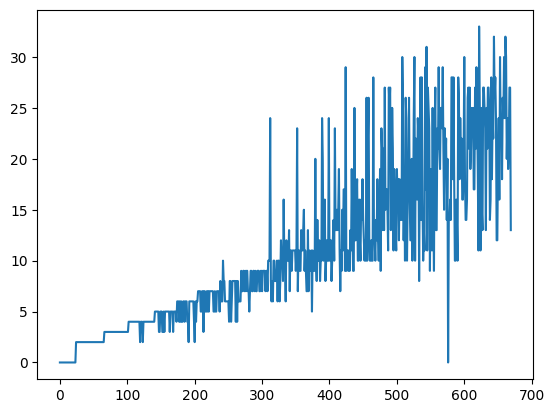

In [11]:
df_metrop["solution_len"].plot()

In [12]:
df = pd.read_pickle("../assets/reports/cpp_reports_1000.pkl")

In [14]:
[len(p) for p in df["solution"]]

[23,
 23,
 23,
 23,
 25,
 23,
 23,
 23,
 23,
 25,
 23,
 21,
 23,
 23,
 23,
 23,
 21,
 25,
 21,
 23]

<Axes: >

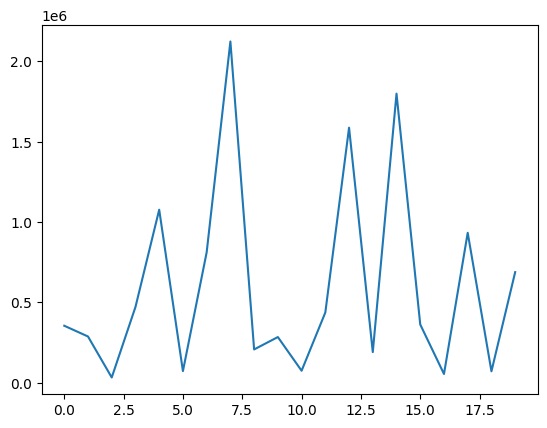

In [17]:
df["visit_nodes"].plot()